# OCR with $k$-nearest neighbors algorithm
## Cyril Gorlla
## University of California, San Diego

We'll be looking at handwritten images of digits with accompanying labels from the classic [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The data are stored as 784-dimensional vectors. We will employ $k$-nn with differing values of $k$ to detect what numbers are written in the testing and validation data.

In [8]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.stats import mode
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
test = pd.read_csv('test.txt', header=None,sep=' ')
train = pd.read_csv('train.txt', header=None,sep=' ')
validate = pd.read_csv('validate.txt', header=None,sep=' ')

In [3]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The last column contains the digit that that row represents. We will split the label from the feature vector.

In [5]:
test_feature = test.drop(784,axis=1)
test_label = test[[784]]
train_feature = train.drop(784,axis=1)
train_label = train[[784]]
validate_feature = validate.drop(784,axis=1)
validate_label = validate[[784]]

In [55]:
print(train.shape[0],test.shape[0],validate.shape[0])

2000 1000 1000


Let's see how an image in the dataset looks.

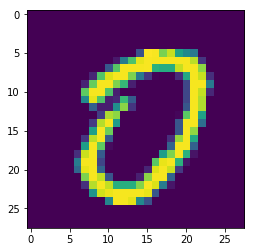

In [66]:
plt.imshow(np.array(test_feature.iloc[1,:]).reshape(28,28))
plt.show()

In [67]:
test_label[784][1]

0

In [283]:
def knn(train_x, train_y, test_x, test_y, klist):
    error = []
    for k in klist:
        #Take the pairwise Euclidean distance between matrices
        dist = pd.DataFrame(distance.cdist(test_x, train_x))
        #Find the indices of the k smallest differences
        ks = dist.apply(lambda x: np.argpartition(x,(k-1)),axis=1)
        inter = ks[np.arange(0,k)]
        #Match the indices of the k nearest neighbors with the labels
        finalk= inter.apply(lambda x: [train_y[784][x] for x in x])
        #Calculate error with predicted ys and actual ys
        pred_y = pd.DataFrame((mode(finalk,axis=1))[0])
        if (((pred_y[0] == test_y[784]).value_counts(normalize=True))[True] ==1):
            err = 0
        else:
            err = ((pred_y[0] == test_y[784]).value_counts(normalize=True))[False]
        error.append(err)
    return error

In [284]:
pd.DataFrame({'k': [1,5,9,15],'Training Error':knn(train_feature,train_label,train_feature,train_label,[1,5,9,15]),'Validation Error':knn(train_feature,train_label,validate_feature,validate_label,[1,5,9,15])}).set_index('k')

,Training Error,Validation Error
k,,
1,0.0000,0.082
5,0.0565,0.095
9,0.0685,0.104
15,0.0925,0.108


In [285]:
%timeit -n 1 -r 1 pd.DataFrame({'k': [1,5,9,15],'Training Error':knn(train_feature,train_label,train_feature,train_label,[1,5,9,15]),'Validation Error':knn(train_feature,train_label,validate_feature,validate_label,[1,5,9,15])}).set_index('k')

25.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [302]:
pd.DataFrame({'k': [1],'Test Error':knn(train_feature,train_label,test_feature,test_label,[1])}).set_index('k')

,Test Error
k,
1,0.094


$k=1$ performs best with a validation error of $.082$.

The test error with $k=1$ is $0.094$.

Now, we'll project the 784-dimensional vector down to 20 dimensions and see how this affects our results.

In [306]:
proj = pd.read_csv('projection.txt',header=None,sep=' ')
proj

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.015626,-0.019702,-0.005087,0.027078,0.015511,-0.048531,-0.005318,-0.007703,0.029581,0.018437,0.052615,-0.033708,0.064847,-0.033585,-0.017796,-0.061265,-0.025245,-0.019012,-0.053294,-0.059311
1,-0.043534,0.038514,0.061698,-0.026509,-0.014271,-0.010595,0.016936,-0.008244,0.043120,0.020635,-0.015361,0.023042,0.035583,0.056888,-0.041535,0.041684,0.028070,0.031850,0.002475,0.000526
2,-0.016051,-0.016189,0.030413,-0.041727,-0.035487,0.006792,-0.043063,-0.016762,-0.076310,-0.005724,-0.030372,-0.010438,0.044302,-0.003053,-0.026926,-0.019525,0.023908,-0.008592,0.036698,0.006946
3,-0.007883,0.040432,-0.013534,-0.004234,-0.028055,0.018167,-0.043165,-0.027020,0.051053,-0.014050,-0.047476,0.007069,-0.001732,-0.038721,0.048611,-0.018313,-0.009919,0.042606,-0.018157,-0.019787
4,0.039536,0.003373,0.048432,-0.016864,-0.036708,-0.032352,-0.004686,-0.044178,-0.058599,-0.049298,0.039729,0.004514,-0.007552,-0.068464,-0.007477,0.004580,-0.025271,0.050935,-0.056193,0.023619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,-0.018513,-0.002730,0.026046,-0.004535,0.046352,0.001983,0.007321,0.052615,-0.002271,0.005625,0.036711,0.064087,0.042673,0.009288,0.011852,-0.000708,0.028405,-0.017065,0.000580,0.020156
780,0.025882,-0.016902,0.026681,0.065048,-0.004308,0.061711,0.056073,-0.046077,-0.041370,-0.009092,0.005312,-0.022242,0.027804,0.040007,-0.000503,0.056319,-0.015092,0.049711,-0.019852,0.020169
781,0.008475,0.017197,-0.063448,-0.018675,-0.068061,0.013647,-0.007683,0.035141,0.013537,0.057896,-0.043336,0.064084,0.005907,-0.046946,0.002682,0.013474,0.027636,0.065384,-0.003264,0.026077
782,-0.025274,0.005125,-0.023191,-0.008528,0.001310,0.049925,-0.000252,0.005470,-0.000229,0.015768,-0.041369,0.000429,-0.075078,-0.041001,-0.034407,0.008649,0.026691,0.069659,-0.047332,-0.044200


We have the projection matrix $P$. We can project onto a vector $v$ by utilizing matrix multiplication.

In [312]:
train_proj = train_feature.dot(proj)
test_proj = test_feature.dot(proj)
validate_proj = validate_feature.dot(proj)

In [313]:
pd.DataFrame({'k': [1,5,9,15],'Training Error':knn(train_proj,train_label,train_proj,train_label,[1,5,9,15]),'Validation Error':knn(train_proj,train_label,validate_proj,validate_label,[1,5,9,15])}).set_index('k')

,Training Error,Validation Error
k,,
1,0.0000,0.320
5,0.1945,0.299
9,0.2305,0.302
15,0.2570,0.289


In [311]:
%timeit -n 1 -r 1 pd.DataFrame({'k': [1,5,9,15],'Training Error':knn(train_proj,train_label,train_proj,train_label,[1,5,9,15]),'Validation Error':knn(train_proj,train_label,validate_proj,validate_label,[1,5,9,15])}).set_index('k')

3.44 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [314]:
pd.DataFrame({'k': [9],'Test Error':knn(train_proj,train_label,test_proj,test_label,[9])}).set_index('k')

,Test Error
k,
9,0.293


The classification accuracy is much worse when using projected data. The best validation error was $.082$ with the full dimensional data, but it was only $.29$ when using the projected twenty-dimensional data. However, the projection did reduce the running time, from 26 seconds with the full data to 3.4 seconds with the projected data.